In [1]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
print("GPU is available:", tf.config.list_physical_devices('GPU'))


GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# # CPU Optimizations 
# tf.config.experimental.set_virtual_device_configuration(
#     tf.config.experimental.list_physical_devices("CPU")[0],
#     [tf.config.experimental.VirtualDeviceConfiguration()],
# )

 # GPU Memory Limit Optimization
tf.config.set_logical_device_configuration(
     tf.config.list_physical_devices("GPU")[0],
     [tf.config.LogicalDeviceConfiguration(memory_limit=5899)],
)

Load Dataset yang ingin digunakan

In [4]:
# Step 1: Memasukkan Data set
data = pd.read_csv('Shark_Comparison_Dataset.csv')

In [5]:
print(data.columns)

Index(['Species', 'Average_Length_m', 'Maximum_Length_m', 'Average_Weight_kg',
       'Maximum_Weight_kg', 'Lifespan_years', 'Swimming_Speed_kmh',
       'Bite_Force_N', 'Gestation_Period_months', 'Number_of_Teeth',
       'Diet_kg_per_week'],
      dtype='object')


Proses Pre-Processing Data

In [6]:
# Step 2: Encode label (Species)
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])  

In [7]:
# Step 2: Split data into features (X) and target (y)
X = data.drop(columns='Species')
y = data['Species']

In [8]:
# Step 2: Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=300 / len(X), random_state=69)

In [9]:
# step 2: Normalisasikan
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Step 2: Convert target to categorical format for binary classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
# Display data before applying StandardScaler
print("Data before StandardScaler:")
display(X.head(20))

# Display data after applying StandardScaler
print("Data after StandardScaler:")
X_train_df = pd.DataFrame(X_train, columns=X.columns)
display(X_train_df.head(20))

Data before StandardScaler:


,Average_Length_m,Maximum_Length_m,Average_Weight_kg,Maximum_Weight_kg,Lifespan_years,Swimming_Speed_kmh,Bite_Force_N,Gestation_Period_months,Number_of_Teeth,Diet_kg_per_week
0,4.59,6.81,1019.25,2180.29,71,56.34,17981.54,12,291,190.36
1,2.71,2.98,144.69,327.66,15,21.92,2849.02,8,180,45.51
2,4.41,6.35,1090.19,2295.40,70,50.80,16624.95,11,306,191.58
3,3.28,3.03,172.16,303.87,13,22.23,3187.80,9,205,50.71
4,4.50,6.69,1084.09,2215.87,68,61.11,18739.49,12,288,196.70
5,2.74,3.30,152.04,276.62,16,25.36,2860.12,8,187,45.42
6,4.95,6.34,1156.27,2196.03,73,53.49,16962.62,13,315,216.08
7,2.90,3.41,148.47,295.48,15,23.11,3292.96,8,209,47.05
8,4.62,5.80,1124.83,2199.67,68,60.29,17000.90,10,300,209.15
9,3.26,3.33,153.21,277.89,14,24.55,3223.22,9,202,47.90


Data after StandardScaler:


,Average_Length_m,Maximum_Length_m,Average_Weight_kg,Maximum_Weight_kg,Lifespan_years,Swimming_Speed_kmh,Bite_Force_N,Gestation_Period_months,Number_of_Teeth,Diet_kg_per_week
0,1.293205,0.668145,1.098697,1.212335,1.003519,1.058817,1.067993,1.711247,1.377663,1.033901
1,-0.716393,-0.967286,-1.021765,-1.018784,-1.007914,-0.966666,-1.011481,-0.584822,-1.306565,-0.929168
2,-0.946793,-0.948911,-0.996283,-0.983845,-1.043832,-1.060140,-0.974287,-0.584822,-0.693027,-1.050208
3,1.114006,0.913154,1.121480,1.203561,1.003519,0.868774,0.944512,1.137230,1.166760,0.772000
4,1.485205,1.225540,0.866273,1.193561,0.788008,0.657683,0.987764,0.563212,1.243452,1.177537
5,0.627606,0.833526,1.144944,0.989869,0.859845,0.962867,0.992941,1.711247,1.396836,1.141991
6,1.229206,0.919279,1.184198,0.908187,1.003519,1.198719,0.964979,-0.010805,0.955856,0.953560
7,1.306005,0.931530,1.009328,0.933556,1.254948,0.757966,1.205529,-0.010805,1.300971,0.948670
8,-0.639593,-0.789655,-1.001001,-1.019665,-0.971995,-0.901667,-0.981313,-0.584822,-0.923104,-1.037258
9,-0.857193,-0.789655,-0.985189,-1.008993,-0.971995,-1.052092,-0.988494,-0.584822,-1.268219,-0.954671


Pembuatan Model

Epoch 1/30
38/43 [=========================>....] - ETA: 0s - loss: 0.6580 - accuracy: 0.5337
Epoch 1 Weights:
Layer: Hidden_Layer_1
Weights:
[[ 0.27630728  0.30361402 -0.06078844  0.145613    0.18336637 -0.20737182
  -0.16640206  0.36122143 -0.2640093   0.34475556  0.03847787 -0.27505326
   0.13433     0.06356287  0.06287765 -0.29762074 -0.0912403   0.2112056
  -0.15675555  0.19462322 -0.13137756  0.05441783 -0.29938838 -0.0820998
   0.35425347 -0.14678025  0.01411765 -0.04237349  0.0847825  -0.09476553
   0.1108278  -0.23165205  0.18385276 -0.19401239 -0.07823645 -0.02906983]
 [-0.2628907   0.34958723 -0.22675231 -0.21717258 -0.24624933 -0.09789328
  -0.1361      0.33580166 -0.3371144   0.10245157  0.27731928  0.3104715
  -0.20828027  0.17029047 -0.32767043  0.34872475  0.06093649  0.2841529
  -0.1778104  -0.12857366  0.2637501   0.01080386  0.04705592 -0.04992516
  -0.2456318   0.09234416 -0.19995543 -0.26739717 -0.11832211  0.11258815
   0.23856714 -0.13867663  0.16331482  0.299585

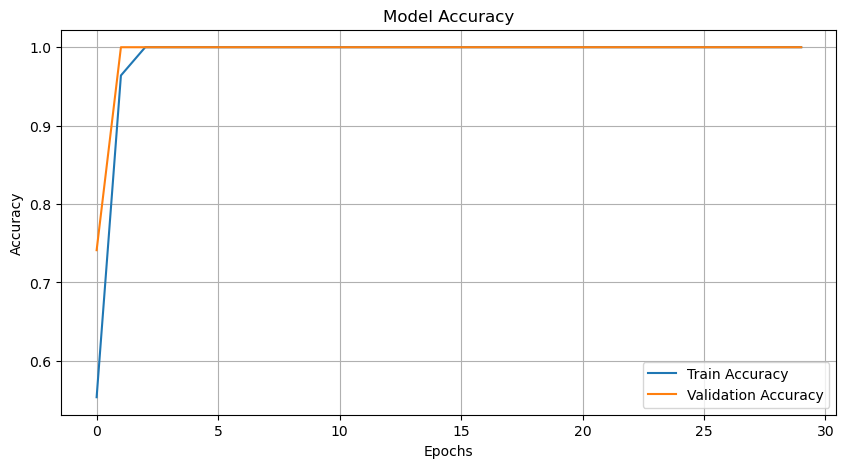

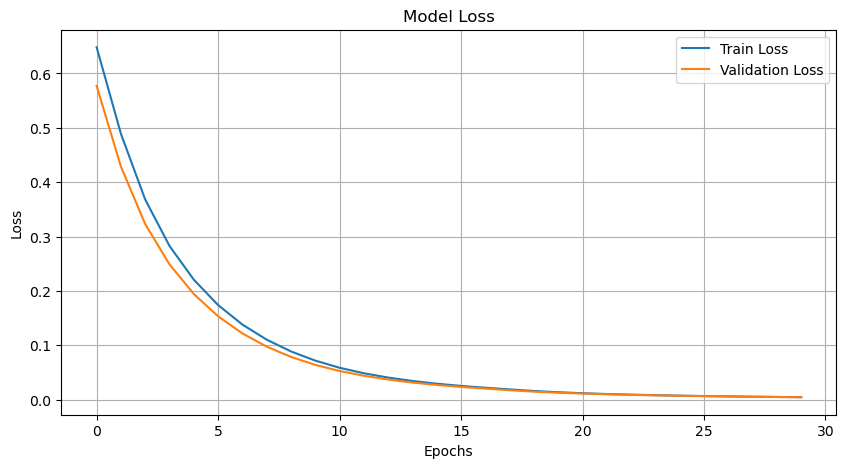

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback


# Step 5: Membuat Model MLP
model = Sequential([
    Dense(36, input_dim=X_train.shape[1], activation='relu', name='Hidden_Layer_1'),
    Dense(24, activation='relu', name='Hidden_Layer_2'),
    Dense(2, activation='softmax', name='Output_Layer')
])

# Step 5: Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Membuat Callback agar bisa melihat Weight setiap epoch
class WeightLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"\nEpoch {epoch + 1} Weights:")
        for layer in self.model.layers:
            if hasattr(layer, 'weights') and len(layer.weights) > 0:
                weights, biases = layer.get_weights()
                print(f"Layer: {layer.name}")
                print(f"Weights:\n{weights}")
                print(f"Biases:\n{biases}\n")

# Tambahkan callback ke dalam proses fitting
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    callbacks=[WeightLogger()],
    verbose=1
)

# Step 6: Visualize Training History
# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid()
plt.show()


In [13]:
# Memberikan Summary dari proses fitting
model.summary(), history.history



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 36)                396       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 24)                888       
                                                                 
 Output_Layer (Dense)        (None, 2)                 50        
                                                                 
Total params: 1,334
Trainable params: 1,334
Non-trainable params: 0
_________________________________________________________________


(None,
 {'loss': [0.6482759118080139,
   0.4890958368778229,
   0.36807554960250854,
   0.2827756404876709,
   0.22077423334121704,
   0.17410655319690704,
   0.13823087513446808,
   0.11048365384340286,
   0.08883540332317352,
   0.07192531228065491,
   0.058810148388147354,
   0.048662248998880386,
   0.040752626955509186,
   0.03448474407196045,
   0.029456205666065216,
   0.025385141372680664,
   0.022025056183338165,
   0.01900242269039154,
   0.016098657622933388,
   0.01377237867563963,
   0.011971410363912582,
   0.01052345335483551,
   0.009331261739134789,
   0.008332575671374798,
   0.007484941743314266,
   0.0067595746368169785,
   0.006130661815404892,
   0.005584295839071274,
   0.005104711279273033,
   0.004683075472712517],
  'accuracy': [0.5536764860153198,
   0.9639706015586853,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,


Evaluasi Model

In [14]:
# Step 7: Mengetes Model menggunakan data test
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)  # Jika model output-nya probabilitas

# Jika y_test dalam format one-hot encoded, ambil argmax untuk label yang diprediksi
y_test_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(predicted_classes, axis=1)

# Hitung akurasi
correct_predictions = np.sum(predicted_labels == y_test_labels)
accuracy = correct_predictions / len(y_test) * 100

print(f"Number of correct predictions: {correct_predictions}")
print(f"Accuracy: {accuracy:.2f}%")

10/10 [==============================] - 0s 2ms/step
Number of correct predictions: 300
Accuracy: 100.00%


In [15]:
# Step 7: Evaluasi Model
results = model.evaluate(X_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.004544658586382866, 1.0]


10/10 [==============================] - 0s 1ms/step


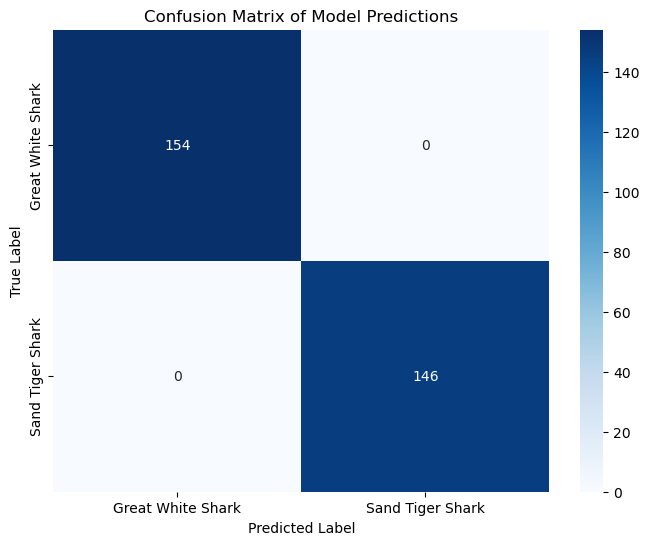

In [16]:
# Menggunakan Confusion Matrix untuk membaca hasil

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Get true labels
true_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix of Model Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()